<h1>HW1-Question1</h1>

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import math,statistics
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
housing_data_source = pd.read_csv("housing prediction.csv")

In [3]:
housing_data_input=housing_data_source.drop(columns=["date"])

In [4]:
housing_data_input.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
housing_data_input.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
continuous_columns=[]
categorical_columns = []
for col in housing_data_input.columns.values.tolist():
    if(housing_data_input[col].dtype in numerics):
      continuous_columns.append(col)  
    else:
        categorical_columns.append(col)

In [7]:
continuous_columns

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated']

In [8]:
categorical_columns

['street', 'city', 'statezip', 'country']

In [9]:
housing_data_input.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


<h3> Categorization of the variables based on the data:</h3>
<ol>
    <li> price        - Continuous</li>
    <li> bedrooms     - Discrete - Continous</li>     
    <li> bathrooms    - Discrete - Continous</li>
    <li> sqft_living  - Continuous</li>
    <li> sqft_lot     - Continuous</li>
    <li> floors       - Discrete - Continous</li>
    <li> waterfront   - Discrete - Continous</li>
    <li> view         - Discrete - Continous</li>
    <li> condition    - Categorical</li>
    <li> sqft_above   - Continuous</li>
    <li> sqft_basement- Continuous</li>
    <li> yr_built     - Discrete - Continous</li>
    <li> yr_renovated - Discrete - Continous</li>
    <li> street       - Categorical</li>
    <li> city         - Categorical</li>
    <li> statezip     - Categorical</li>
    <li> country      - Categorical</li>

In [10]:
housing_data_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
dtypes: float64(4), int64(9), object(4)
memory usage: 611

In [11]:
housing_data_input.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


<H3> Dropping rows where price has 'NA' </H3>

In [12]:
housing_data_price_na = housing_data_input.dropna(subset=["price"])

In [13]:
print(housing_data_input.shape[0])
print(housing_data_price_na.shape[0])
#found no records where price is na

4600
4600


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

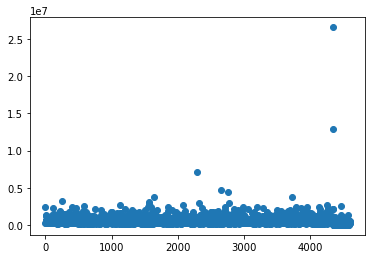

In [15]:
plt.scatter(housing_data_price_na.index,housing_data_price_na["price"])
plt.show()

In [16]:
housing_data_price_na["price"].describe()

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

Here, we can see average of the pricing is almost \\$551,000 . There are few houses with zero prices. The maximum price of the house is nearly $ 2.67M which is most likely an outlier. Let's check the distribution of the pricing. The idea is to check if it is normally distributed or not and to see how to tackle with outliers.

In [17]:
perc = [25,50,75,90,95,99,100]
for i in perc:
    print("The {}th percentile of price is {}".format(i,np.percentile(housing_data_price_na["price"],i)))
    

The 25th percentile of price is 322875.0
The 50th percentile of price is 460943.46153850004
The 75th percentile of price is 654962.5
The 90th percentile of price is 900000.0
The 95th percentile of price is 1184050.0000000002
The 99th percentile of price is 2005220.000000005
The 100th percentile of price is 26590000.0


In [18]:
import seaborn as sb
from scipy.stats import norm

Let's take 0 to 99th percentile records.

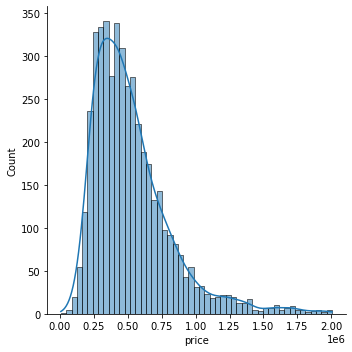

In [19]:
sb.displot(housing_data_price_na.loc[(housing_data_price_na['price']>0) & (housing_data_price_na['price']<np.percentile(housing_data_price_na["price"],99)) ,'price'],kde=True)

This is not exactly normal distribution. Looks like it is bit left skewed. We can take a log of the values to make it more normal. But let's keep it like this for now and let's take these records as our final dataset for training and testing. 

Let's plot other variable's univariate distributions.

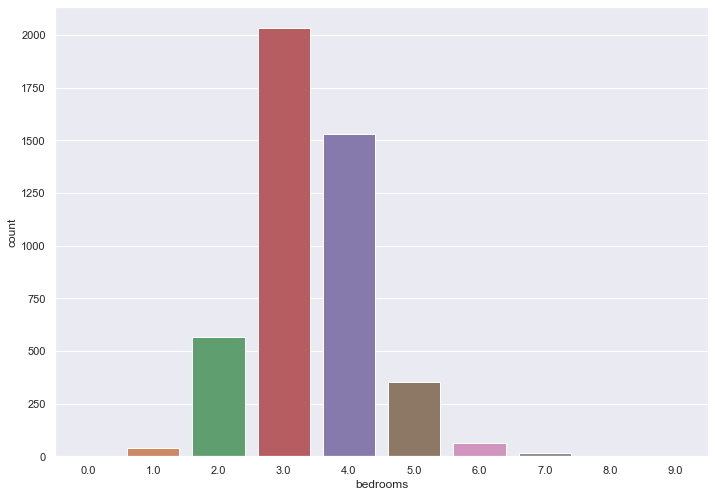

In [20]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.set_theme(style="darkgrid")
bedrooms_plot = sb.countplot(x="bedrooms",data=housing_data_price_na)

Maximum number of houses (~50%) have 3 bed rooms and almost 1/3rd have 4 bed rooms. > 6 bed rooms are very less.

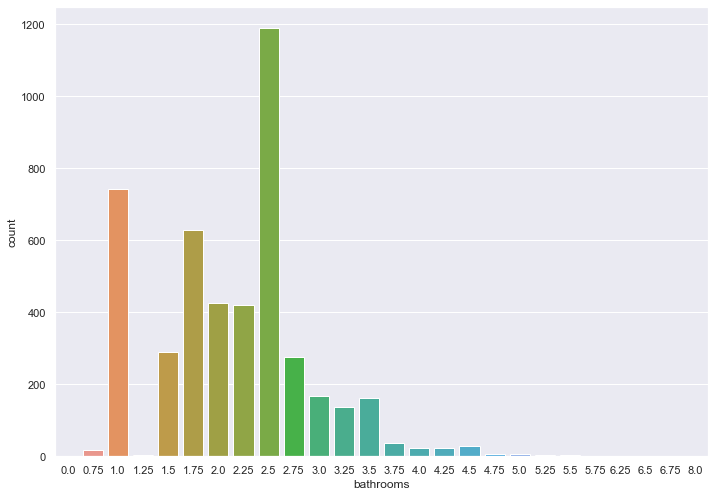

In [21]:
sb.set_theme(style="darkgrid")
bathrooms_plot = sb.countplot(x="bathrooms",data=housing_data_price_na)

Here maximum houses have 2.5 washrooms. Next is 1 or 1.75 washrooms. There are very few with >3.5 washrooms.

1114


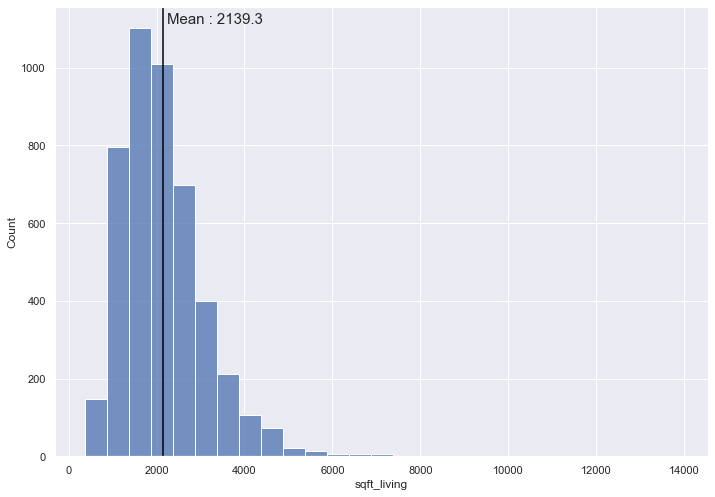

In [22]:
binsize=500
col_name='sqft_living'
perctl=100
bins=range(0,max(housing_data_price_na.loc[housing_data_price_na[col_name]<=np.percentile(housing_data_price_na[col_name],perctl),col_name]),binsize)

counts,_,=np.histogram(housing_data_price_na.loc[housing_data_price_na[col_name]<=np.percentile(housing_data_price_na[col_name],perctl),col_name],bins=bins)
sb.histplot(data=housing_data_price_na.loc[housing_data_price_na[col_name]<=np.percentile(housing_data_price_na[col_name],perctl)]
            ,x=col_name,binwidth=binsize)
plt.axvline(np.mean(housing_data_price_na[col_name]),color='black')
plt.text(housing_data_price_na[col_name].mean()+100,
         max(counts),
         "Mean : " + 
         str(round(np.mean(housing_data_price_na[col_name]),1)),size=15)

print(max(counts))

The mean of the sqft living is 2139.3 sqft. This is also right skewed as the price itself. 

Text(14952.516086956522, 100, 'Mean : 14852.5')

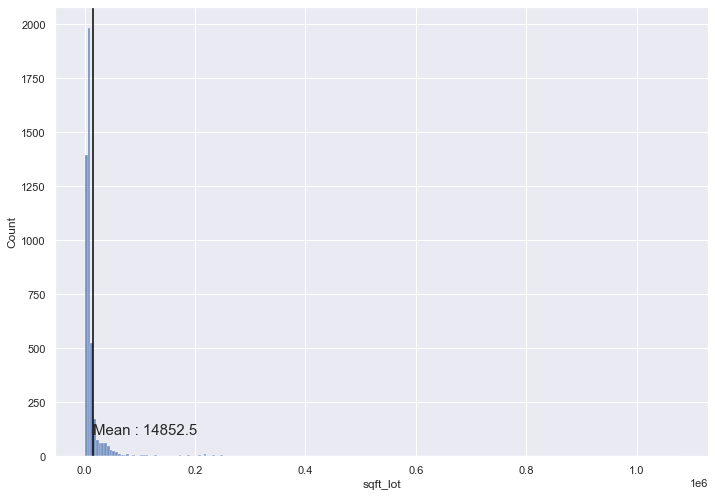

In [23]:
sb.histplot(data=housing_data_price_na,x='sqft_lot',binwidth=5000)
plt.axvline(np.mean(housing_data_price_na['sqft_lot']),color='black')
plt.text(housing_data_price_na['sqft_lot'].mean()+100,
         100,
         "Mean : " + 
         str(round(np.mean(housing_data_price_na['sqft_lot']),1)),size=15)

Looks like we have some extreme cases. Lets dig deeper. 

In [24]:
housing_data_price_na['sqft_lot'].describe()

count    4.600000e+03
mean     1.485252e+04
std      3.588444e+04
min      6.380000e+02
25%      5.000750e+03
50%      7.683000e+03
75%      1.100125e+04
max      1.074218e+06
Name: sqft_lot, dtype: float64

We have a maximum of ~1M Sqft. Let's see how the percentiles look like.

In [25]:
perc = [25,50,75,90,95,99,100]
for i in perc:
    print("The {}th percentile of sqft_lot is {}".format(i,np.percentile(housing_data_price_na["sqft_lot"],i)))
    

The 25th percentile of sqft_lot is 5000.75
The 50th percentile of sqft_lot is 7683.0
The 75th percentile of sqft_lot is 11001.25
The 90th percentile of sqft_lot is 24301.800000000007
The 95th percentile of sqft_lot is 43560.0
The 99th percentile of sqft_lot is 203455.49000000066
The 100th percentile of sqft_lot is 1074218.0


Let's plot only till 95% percentile for better picture. 

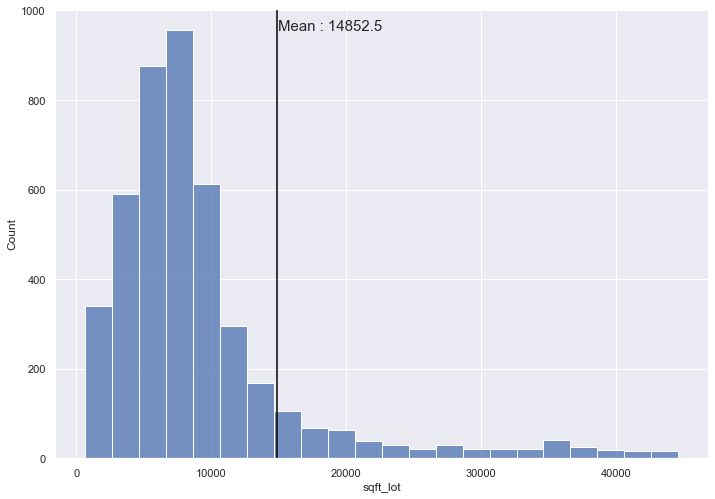

In [26]:
binsize=2000
col_name='sqft_lot'
perctl=95
bins=range(0,max(housing_data_price_na.loc[housing_data_price_na[col_name]<=np.percentile(housing_data_price_na[col_name],perctl),col_name]),binsize)

counts,_,=np.histogram(housing_data_price_na.loc[housing_data_price_na[col_name]<=np.percentile(housing_data_price_na[col_name],perctl),col_name],bins=bins)
sb.histplot(data=housing_data_price_na.loc[housing_data_price_na[col_name]<=np.percentile(housing_data_price_na[col_name],perctl)]
            ,x=col_name,binwidth=binsize)
plt.axvline(np.mean(housing_data_price_na[col_name]),color='black')
plt.text(housing_data_price_na[col_name].mean()+100,
         max(counts),
         "Mean : " + 
         str(round(np.mean(housing_data_price_na[col_name]),1)),size=15)
plt.show()

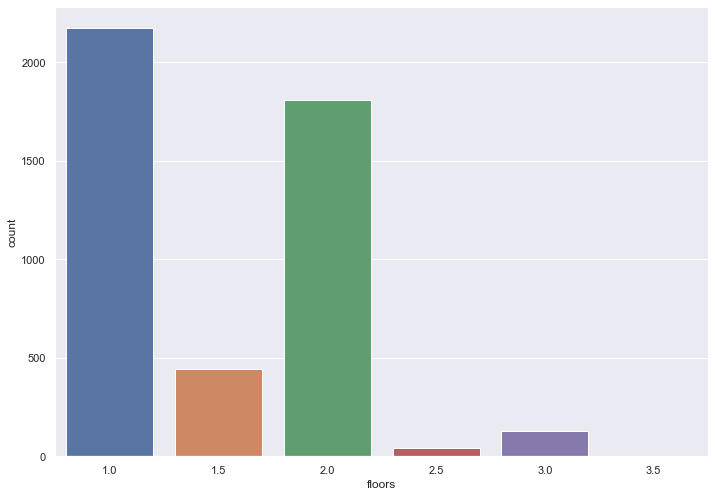

In [27]:
sb.set_theme(style="darkgrid")
floors_plot = sb.countplot(x="floors",data=housing_data_price_na)

Most of the houses have either 1 floor or 2 floors.

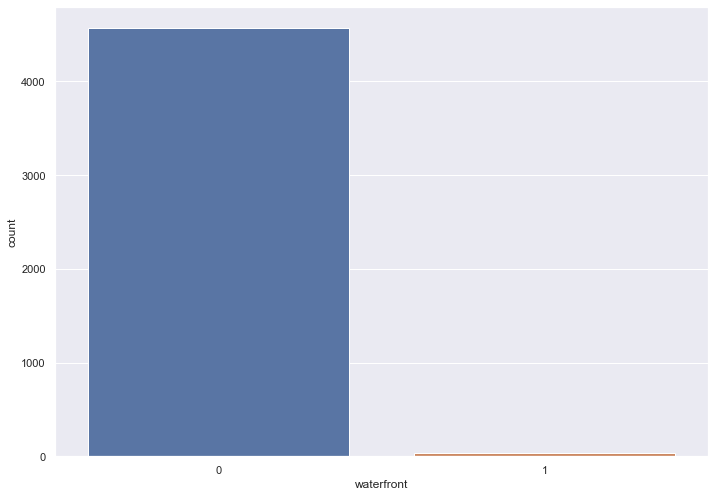

In [28]:
waterfront_plot = sb.countplot(x="waterfront",data=housing_data_price_na)

Wow ! Almost everything is 0 for waterfront. We need not consider this variable for our modelling. 

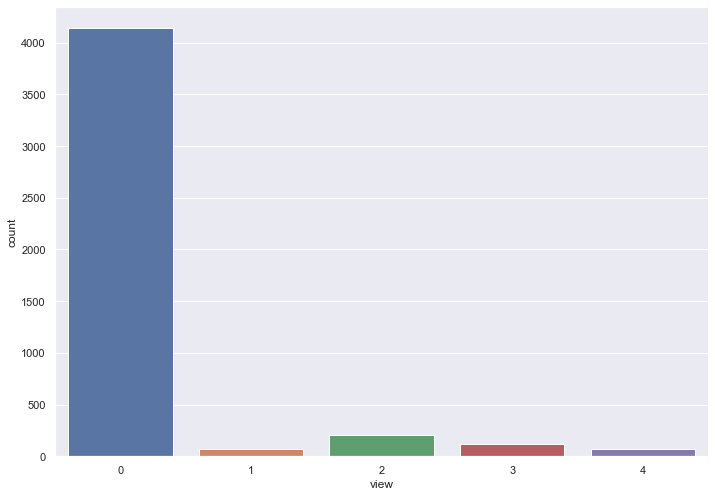

In [29]:
#view
view_plot = sb.countplot(x="view",data=housing_data_price_na)

Similar to Waterfront, view is 0 for almost all the records. We can keep this variable also on hold for modelling.

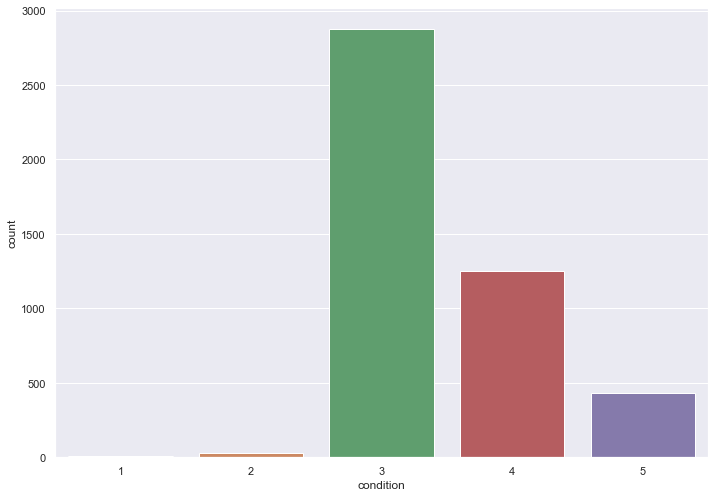

In [30]:
#condition
sb.countplot(x="condition",data=housing_data_price_na)
plt.show()

Most of the houses have 3 as the condition. Very few of them have <=2.

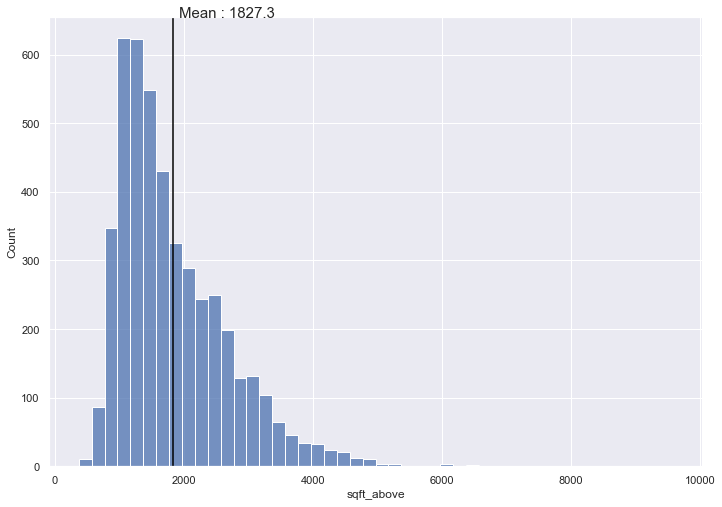

In [31]:
binsize=200
col_name='sqft_above'
perctl=100
bins=list(range(0,max(housing_data_price_na.loc[housing_data_price_na[col_name]<=np.percentile(housing_data_price_na[col_name],perctl),col_name]),binsize))

counts,_,=np.histogram(housing_data_price_na.loc[housing_data_price_na[col_name]<=np.percentile(housing_data_price_na[col_name],perctl),col_name],bins=bins)
sb.histplot(data=housing_data_price_na.loc[housing_data_price_na[col_name]<=np.percentile(housing_data_price_na[col_name],perctl)]
            ,x=col_name,binwidth=binsize)
plt.axvline(np.mean(housing_data_price_na[col_name]),color='black')
plt.text(housing_data_price_na[col_name].mean()+100,
         max(counts),
         "Mean : " + 
         str(round(np.mean(housing_data_price_na[col_name]),1)),size=15)
plt.show()

This is also slightly right skewed like price. But this looks very similar to the distribution of sqft_living.

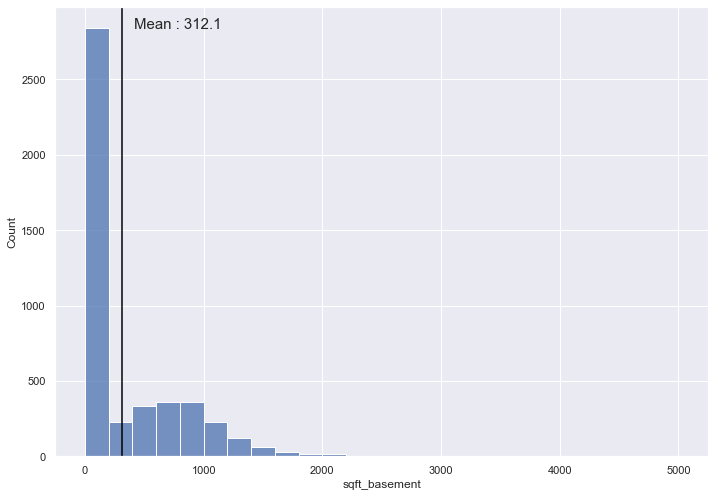

In [32]:
binsize=200
col_name='sqft_basement'
perctl=100
bins=list(range(0,max(housing_data_price_na.loc[housing_data_price_na[col_name]<=np.percentile(housing_data_price_na[col_name],perctl),col_name]),binsize))

counts,_,=np.histogram(housing_data_price_na.loc[housing_data_price_na[col_name]<=np.percentile(housing_data_price_na[col_name],perctl),col_name],bins=bins)
sb.histplot(data=housing_data_price_na.loc[housing_data_price_na[col_name]<=np.percentile(housing_data_price_na[col_name],perctl)]
            ,x=col_name,binwidth=binsize)
plt.axvline(np.mean(housing_data_price_na[col_name]),color='black')
plt.text(housing_data_price_na[col_name].mean()+100,
         max(counts),
         "Mean : " + 
         str(round(np.mean(housing_data_price_na[col_name]),1)),size=15)
plt.show()

This looks very interesting. Basement area is zero in many cases. We might need to relook at this later.

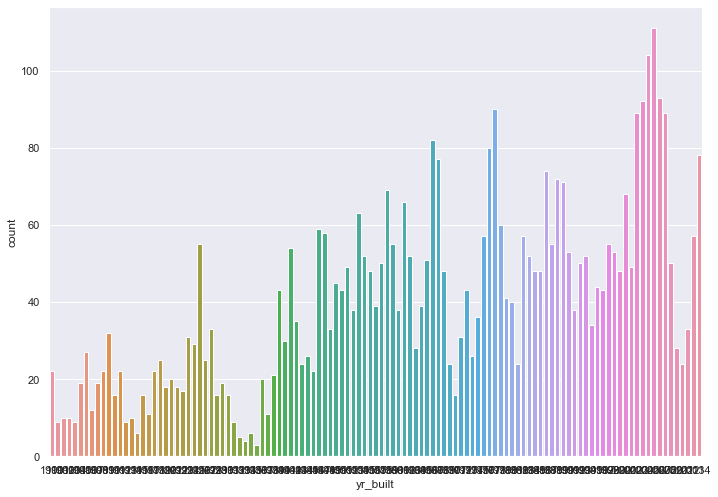

In [33]:
#yr_built
sb.countplot(x="yr_built",data=housing_data_price_na)
plt.show()

This looks cluttered. Lets look decade wise.

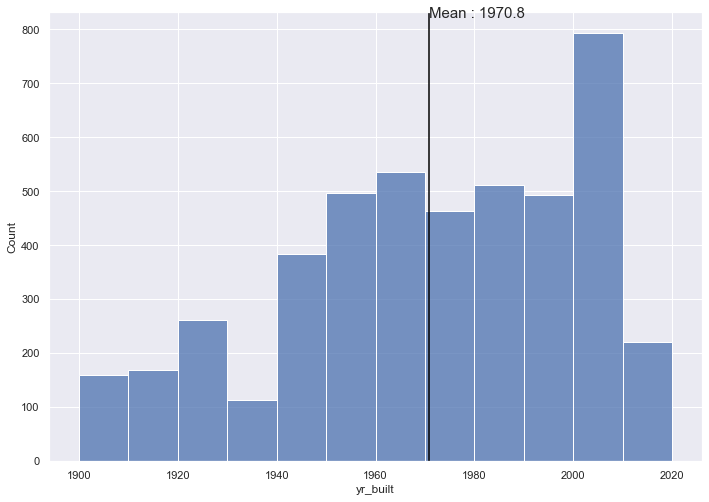

In [34]:
binsize=10
col_name='yr_built'
perctl=100
bins=list(range(min(housing_data_price_na.loc[housing_data_price_na[col_name]<=np.percentile(housing_data_price_na[col_name],perctl),col_name]),
                max(housing_data_price_na.loc[housing_data_price_na[col_name]<=np.percentile(housing_data_price_na[col_name],perctl),col_name]),binsize))

counts,_,=np.histogram(housing_data_price_na.loc[housing_data_price_na[col_name]<=np.percentile(housing_data_price_na[col_name],perctl),col_name],bins=bins)
sb.histplot(data=housing_data_price_na.loc[housing_data_price_na[col_name]<=np.percentile(housing_data_price_na[col_name],perctl)]
            ,x=col_name,binwidth=binsize)
plt.axvline(np.mean(housing_data_price_na[col_name]),color='black')
plt.text(housing_data_price_na[col_name].mean(),
         max(counts),
         "Mean : " + 
         str(round(np.mean(housing_data_price_na[col_name]),1)),size=15)
plt.show()

Mean year is near 1970.

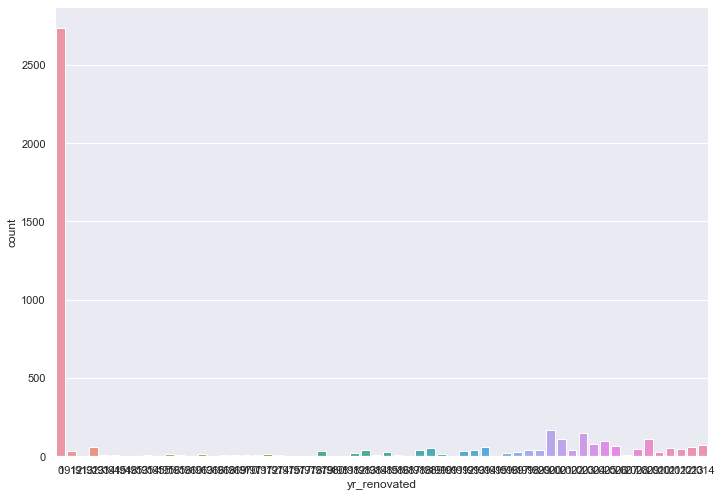

In [35]:
#yr_renovated
sb.countplot(x="yr_renovated",data=housing_data_price_na)
plt.show()

There are lot of houses which have values 0 for yr_renovated column. So they are not renovated at all till date. Let's look at them excluding 0's

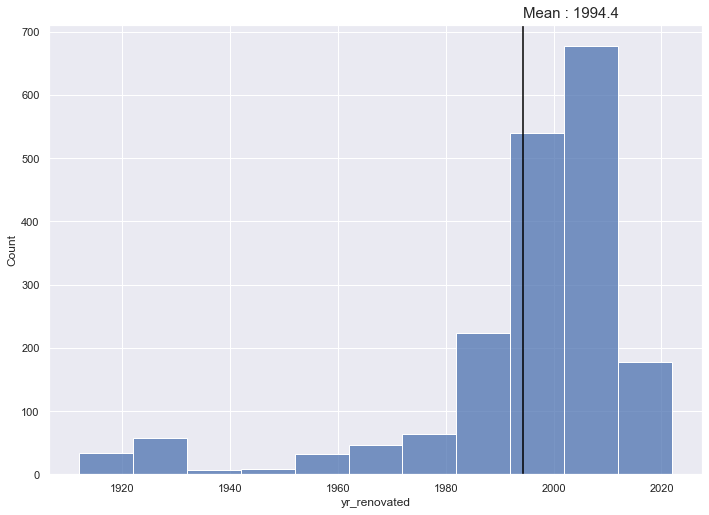

In [36]:
binsize=10
col_name='yr_renovated'
bins=list(range(min(housing_data_price_na.loc[housing_data_price_na[col_name]>0,col_name]),
                max(housing_data_price_na.loc[housing_data_price_na[col_name]>0,col_name]),binsize))

counts,_,=np.histogram(housing_data_price_na.loc[housing_data_price_na[col_name]>0,col_name],bins=bins)
sb.histplot(data=housing_data_price_na.loc[housing_data_price_na[col_name]>0]
            ,x=col_name,binwidth=binsize)
plt.axvline(np.mean(housing_data_price_na.loc[housing_data_price_na[col_name]>0,col_name]),color='black')
plt.text(housing_data_price_na.loc[housing_data_price_na[col_name]>0,col_name].mean(),
         max(counts),
         "Mean : " + 
         str(round(np.mean(housing_data_price_na.loc[housing_data_price_na[col_name]>0,col_name]),1)),size=15)
plt.show()

Most of the houses are renovated after 1970s again. 

Other columns are categorical variables (street, city, statezip, country). Country is always USA. So we can ignore that.  Street is too much granular data and a heavy text information. We can convert city and zip code to dummies and introduce to the model if needed. 

Now, lets plot a 2d scatter plots with each continous (non-discrete) variable to price to understand if any correlation is there.

In [37]:
continuous_features=['sqft_living','sqft_lot','sqft_above','sqft_basement']

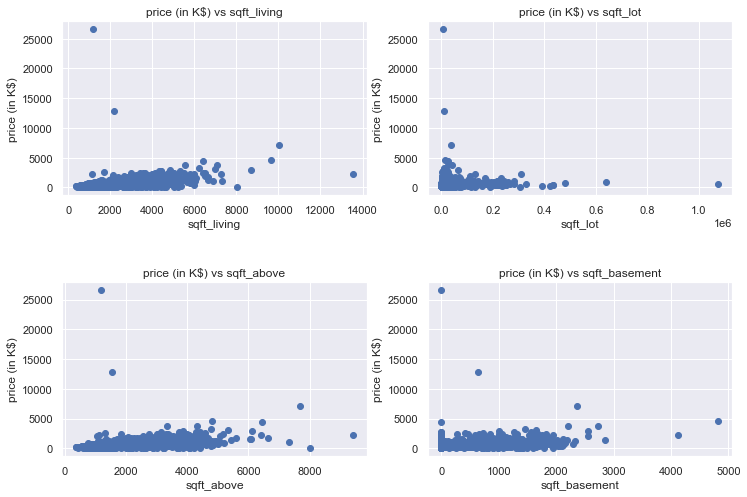

In [38]:
i=0
fig=plt.figure(figsize=(12, 8))
fig.tight_layout()
for col in continuous_features:
    i+=1
    if col=='price':
        continue
    else:
        fig.add_subplot(2,2,i)
        plt.scatter(housing_data_price_na[col],housing_data_price_na['price']/1000)
        plt.xlabel(col)
        plt.ylabel('price (in K$)')
        plt.title('price (in K$) vs ' + col )
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

plt.show()

Let's plot Pearson Correlation Matrix for these variables to understand if iid is there. We can drop some highly dependant variables to avoid redundancy.

In [39]:
data_cont=housing_data_price_na[continuous_features]

<AxesSubplot:>

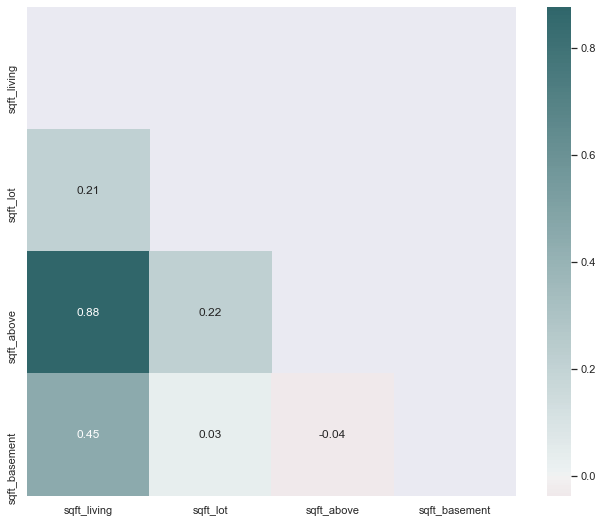

In [40]:
corr = data_cont.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 200, s=75, l=40,
                            n=3, center="light", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

We can see thar sqft_above and sqft_living are highly correlated variables. We can use one of them in the model and drop the other. Let's pick up sql.living for now.

In [41]:
housing_data_price_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
dtypes: float64(4), int64(9), object(4)
memory usage: 775

There are not nulls in any column.

Let's prepare the data for our first model with below transformations from the above observations.<br />
    -   Drop the records where price is zero.<br />
    -   Pick the records only where price is in 99th percentile.<br />
    -   Ignore the columns waterfront, view as they are not adding much value.<br />
    -   Add a column flagging if basement is there or not. <br />
    -   Bucket the years into decades.<br />
    -   Add a column flagging if the house is renovated or not. 

In [42]:
data0=housing_data_price_na[(housing_data_price_na['price']>0) & (housing_data_price_na['price']<np.percentile(housing_data_price_na["price"],99))]

In [43]:
data0['basement_flag']=[0 if x == 0 else 1 for x in data0['sqft_basement']]
data0['renovated_flag']=[0 if x == 0 else 1 for x in data0['yr_renovated']]
data0['year_decade']=(data0['yr_built']/10)
data0=data0.astype({'year_decade':'int64'})
data0['year_decade']=(data0['year_decade']+1)*10


<ipython-input-43-778c440ec2f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data0['basement_flag']=[0 if x == 0 else 1 for x in data0['sqft_basement']]
<ipython-input-43-778c440ec2f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data0['renovated_flag']=[0 if x == 0 else 1 for x in data0['yr_renovated']]
<ipython-input-43-778c440ec2f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [44]:
data0.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,basement_flag,renovated_flag,year_decade
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,0,1,1960
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,0,0,1970
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,1,0,1970
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,1,1,1980
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,0,1,1940


In [45]:
data0.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country',
       'basement_flag', 'renovated_flag', 'year_decade'],
      dtype='object')

For the first model, I'm taking only continous variables and see how it performs.

In [46]:
X_Features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'basement_flag', 'renovated_flag', 'year_decade','condition']

In [47]:
Y_Features=['price']

In [48]:
X,Y=data0[X_Features],data0[Y_Features]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, random_state=0)

In [50]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3378, 9)
(3378, 1)
(1127, 9)
(1127, 1)


Coefficients: 
 [[-5.20777720e+04  6.38709255e+04  2.30982969e+02 -3.40460947e-01
   7.52744878e+04  1.76379758e+03  1.08962985e+04 -2.80393676e+03
   2.68906887e+04]]
Mean squared error: 39207744795.81
Coefficient of determination: 0.51


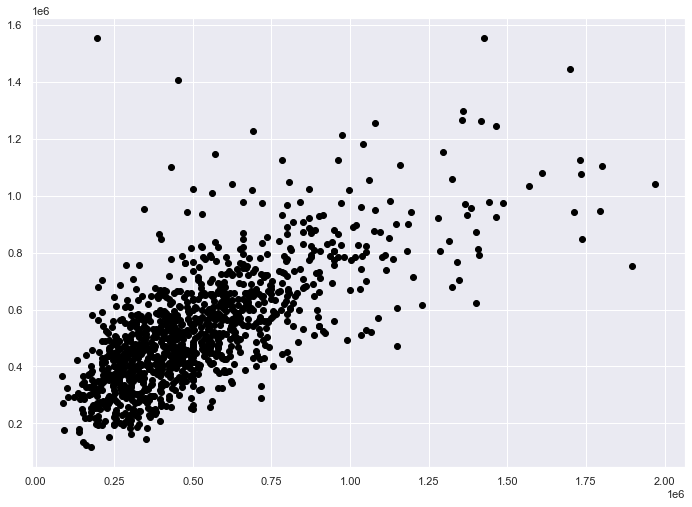

In [51]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
mod=regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test, y_pred,  color='black')
#plt.plot(X_test, y_pred, color='blue', linewidth=3)



plt.show()

Coefficients: 
 [[-5.20569640e+04  6.38325125e+04  2.31001289e+02 -3.40523809e-01
   7.52236318e+04  1.75324043e+03  1.08711491e+04 -2.80367399e+03
   2.68686535e+04]]
Mean squared error: 39207255671.57
Coefficient of determination: 0.51


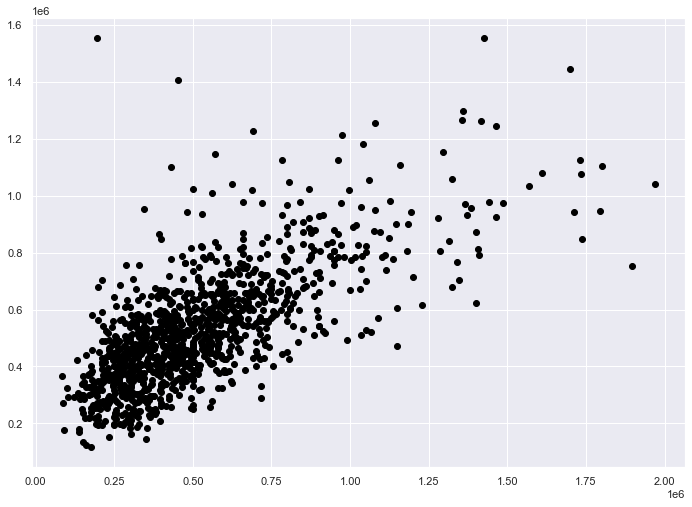

In [52]:
regr = linear_model.Ridge(alpha=.5)
# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test, y_pred,  color='black')
#plt.plot(X_test, y_pred, color='blue', linewidth=3)



plt.show()

Coefficients: 
 [-5.20774918e+04  6.38705724e+04  2.30983193e+02 -3.40461957e-01
  7.52737830e+04  1.76321076e+03  1.08955156e+04 -2.80394060e+03
  2.68901727e+04]
Mean squared error: 39207747377.68
Coefficient of determination: 0.51


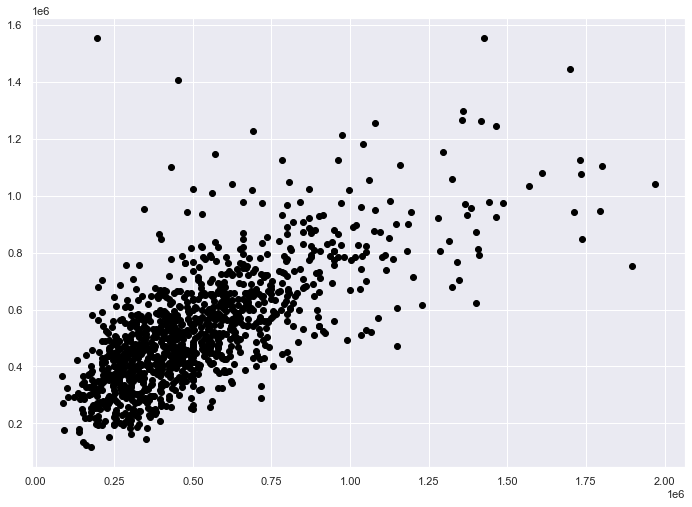

In [53]:
regr = linear_model.Lasso(alpha=0.1)
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test, y_pred,  color='black')
#plt.plot(X_test, y_pred, color='blue', linewidth=3)



plt.show()

Coefficients: 
 [-2.32985691e+04  2.00320749e+04  2.46552925e+02 -3.93211539e-01
  2.44953373e+04 -2.40517102e+03 -1.84217358e+03 -2.37004444e+03
  7.70543675e+03]
Mean squared error: 39891080720.06
Coefficient of determination: 0.50


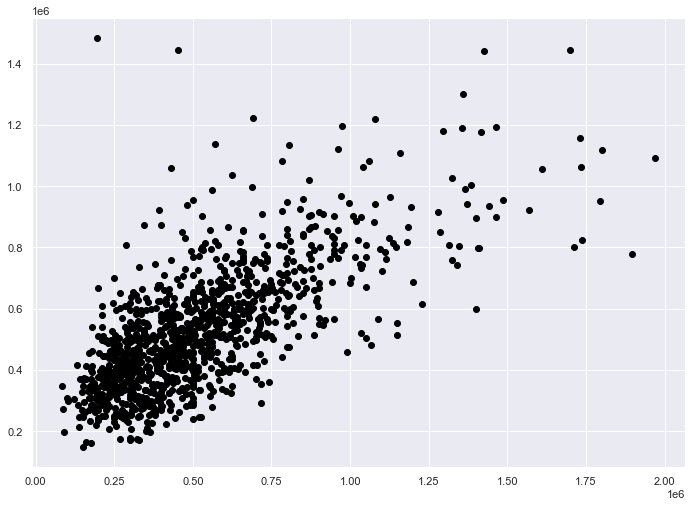

In [54]:
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test, y_pred,  color='black')
#plt.plot(X_test, y_pred, color='blue', linewidth=3)



plt.show()

Now, let me do one hot encoding for the categorical variables and scaling for continous variables to see if there is any improvement in the performance. I am taking only zip code out of street, city, zip code, country(USA) with an assumption that zipcode will give me enough information of other columns in it.

In [55]:
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), X_Features),
     ("onehot", OneHotEncoder(sparse=False), ['statezip'])])

ct2=ColumnTransformer(
    [("scaling", StandardScaler(), ['price'])])


In [56]:
features =X_Features.copy()
features.append('statezip')

In [57]:
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'basement_flag',
 'renovated_flag',
 'year_decade',
 'condition',
 'statezip']

In [58]:
# get all columns apart from income for the features
data_features = data0[features]
# split dataframe and income
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data0['price'], random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

X_test_trans = ct.transform(X_test)


(3378, 86)


Transforming the price also using standard scaling.

In [59]:
y_train2=pd.DataFrame(y_train)
y_test2=pd.DataFrame(y_test)

In [60]:
ct2.fit(y_train2)
y_train_trans = ct2.transform(y_train2)
y_test_trans = ct2.transform(y_test2)

Coefficients: 
 [[-8.44346811e-02  1.03565418e-01  6.26195414e-01  1.67907806e-02
  -1.79342951e-02 -8.79968104e-02  1.55982461e-02 -5.23029723e-02
   6.10838241e-02 -1.36257371e+11 -1.36257371e+11 -1.36257371e+11
  -1.36257371e+11 -1.36257371e+11 -1.36257371e+11 -1.36257371e+11
  -1.36257371e+11 -1.36257371e+11 -1.36257371e+11 -1.36257371e+11
  -1.36257371e+11 -1.36257371e+11 -1.36257371e+11 -1.36257371e+11
  -1.36257371e+11 -1.36257371e+11 -1.36257371e+11 -1.36257371e+11
  -1.36257371e+11 -1.36257371e+11 -1.36257371e+11 -1.36257371e+11
  -1.36257371e+11 -1.36257371e+11 -1.36257371e+11 -1.36257371e+11
  -1.36257371e+11 -1.36257371e+11 -1.36257371e+11 -1.36257371e+11
  -1.36257371e+11 -1.36257371e+11 -1.36257371e+11 -1.36257371e+11
  -1.36257371e+11 -1.36257371e+11 -1.36257371e+11 -1.36257371e+11
  -1.36257371e+11 -1.36257371e+11 -1.36257371e+11 -1.36257371e+11
  -1.36257371e+11 -1.36257371e+11 -1.36257371e+11 -1.36257371e+11
  -1.36257371e+11 -1.36257371e+11 -1.36257371e+11 -1.3625737

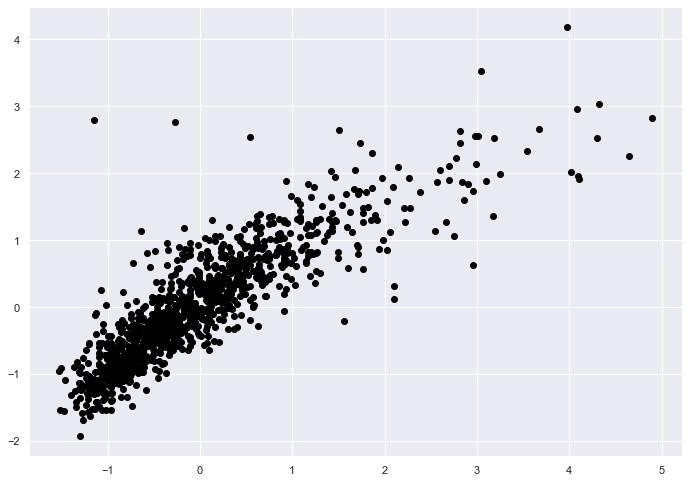

In [61]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
mod=regr.fit(X_train_trans, y_train_trans)

# Make predictions using the testing set
y_pred = regr.predict(X_test_trans)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_trans, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_trans, y_pred))

# Plot outputs
plt.scatter(y_test_trans, y_pred,  color='black')

plt.show()

Coefficients: 
 [-0.08523997  0.10397094  0.62665269  0.01537288 -0.01422519 -0.08532395
  0.01556794 -0.05661989  0.06062886 -0.50970042 -0.55051645 -0.56540363
  1.74119301  0.73619453  0.56324539  0.43948958  0.38515108 -0.
 -0.1279813  -0.16299443 -0.28921068 -0.38951565 -0.57343759  0.23375401
 -0.00983415 -0.03782511  0.32967794 -0.51499898 -0.45983883 -0.53041191
  0.69928297  0.17158939 -0.44243071  1.40719567  1.28930546 -0.52610322
 -0.20557094 -0.27384013 -0.         -0.22176097  0.42455246  0.30001679
 -0.2890512  -0.16884574 -0.27607492 -0.42436417 -0.15064394 -0.12619723
  0.          0.04363728  0.06099593  0.18364857  0.28784331  0.08188177
 -0.59826267  0.81160171  0.56162051  1.34209129 -0.09238481  0.56592705
 -0.07988517  1.48881211  1.56923788  0.58030578  0.61209325  0.59631331
  0.03897317  1.09958667  0.6530984   0.08635316  0.15406435 -0.02031012
  0.49839916  0.58565608  0.         -0.29544334 -0.08904842 -0.02202413
 -0.32805716  0.48024797 -0.40526768 -0.475

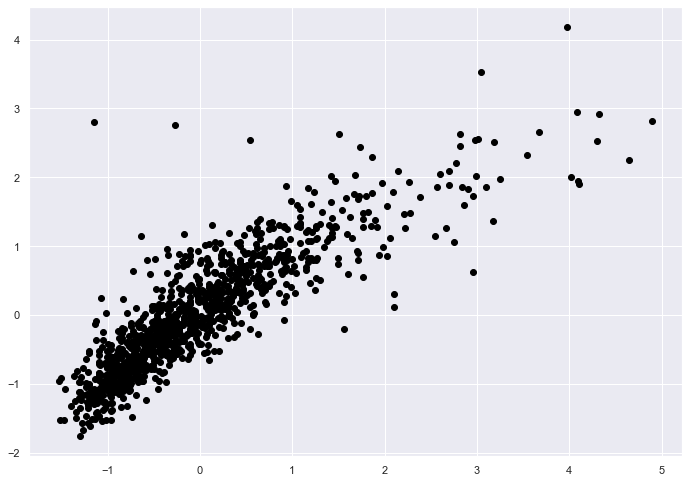

In [62]:
regr = linear_model.Lasso(alpha=0.0001)
mod=regr.fit(X_train_trans, y_train_trans)

# Make predictions using the testing set
y_pred = regr.predict(X_test_trans)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_trans, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_trans, y_pred))

# Plot outputs
plt.scatter(y_test_trans, y_pred,  color='black')

plt.show()

Coefficients: 
 [ 0.          0.          0.11713053  0.          0.          0.
 -0.         -0.          0.         -0.         -0.         -0.
  0.          0.          0.          0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.         -0.          0.         -0.         -0.         -0.
  0.         -0.         -0.          0.          0.         -0.
 -0.         -0.          0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.          0.          0.          0.          0.
 -0.          0.          0.          0.         -0.          0.
 -0.          0.          0.          0.          0.          0.
 -0.          0.          0.         -0.         -0.         -0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.          0.
 -0.         -0.        ]
Mean squared error: 0.79
Coefficient of determin

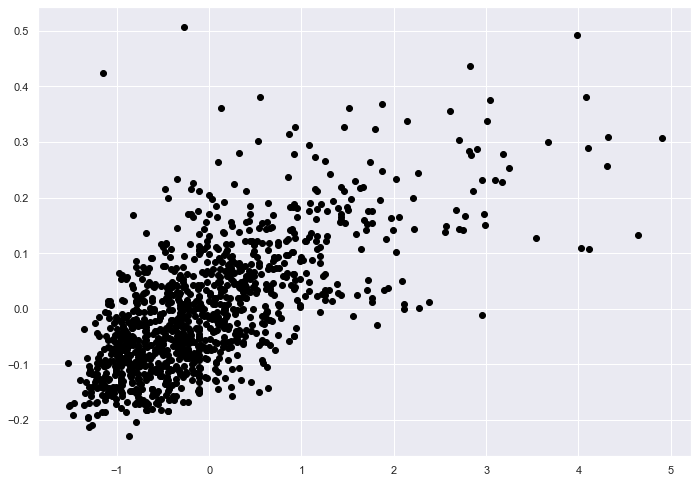

In [63]:
regr = ElasticNet(random_state=1)
mod=regr.fit(X_train_trans, y_train_trans)

# Make predictions using the testing set
y_pred = regr.predict(X_test_trans)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_trans, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_trans, y_pred))

# Plot outputs
plt.scatter(y_test_trans, y_pred,  color='black')



plt.show()

So, it is clear that scaling the data and using column transformer is improving the accuracy. We have seen an increment from 0.5 to 0.75 in R^2 value by doing this. Let's do cross validation on the same. 

In [64]:
from sklearn.model_selection import cross_val_score

# Create linear regression object
regr = linear_model.LinearRegression()

scores = cross_val_score(regr, X_train_trans, y_train_trans, scoring='r2', cv=5)
scores

array([ 7.50407164e-01,  7.73640706e-01,  7.19985865e-01, -5.57120883e+19,
        7.55751781e-01])

In [65]:
regr = linear_model.Lasso(alpha=0.0001)
scores = cross_val_score(regr, X_train_trans, y_train_trans, scoring='r2', cv=5)
scores

array([0.75073099, 0.77316872, 0.7178981 , 0.74857336, 0.75784665])

In [66]:
regr = ElasticNet(random_state=1)
scores = cross_val_score(regr, X_train_trans, y_train_trans, scoring='r2', cv=5)
scores

array([0.1460639 , 0.13583112, 0.13925873, 0.15075251, 0.1358824 ])

<h1>HW1-Question2</h1>

In [67]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import math,statistics
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
import seaborn as sb
import matplotlib.pyplot as plt

In [68]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml("credit-g",version='active') 

data0 = pd.DataFrame(data= np.c_[dataset['data'], dataset['target']],
                     columns= dataset['feature_names'] + ['target'])

In [69]:
data0.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,target
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [70]:
data0.dtypes

checking_status           object
duration                  object
credit_history            object
purpose                   object
credit_amount             object
savings_status            object
employment                object
installment_commitment    object
personal_status           object
other_parties             object
residence_since           object
property_magnitude        object
age                       object
other_payment_plans       object
housing                   object
existing_credits          object
job                       object
num_dependents            object
own_telephone             object
foreign_worker            object
target                    object
dtype: object

In [71]:
data0.describe()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,target
count,1000,1000.0,1000,1000,1000.0,1000,1000,1000.0,1000,1000,...,1000,1000.0,1000,1000,1000.0,1000,1000.0,1000,1000,1000
unique,4,33.0,5,10,921.0,5,5,4.0,4,3,...,4,53.0,3,3,4.0,4,2.0,2,2,2
top,no checking,24.0,existing paid,radio/tv,1393.0,<100,1<=X<4,4.0,male single,none,...,car,27.0,none,own,1.0,skilled,1.0,none,yes,good
freq,394,184.0,530,280,3.0,603,339,476.0,548,907,...,332,51.0,814,713,633.0,630,845.0,596,963,700


While going throw the data and as mentioned in the source website, we can observe that some of them are nominal and some are continuous. Below are the columns categorization:

- **checking_status:** categorical (nominal)
- **duration:** continuous
- **credit_history:** categorical (nominal)
- **purpose:** categorical (nominal)
- **credit_amount:** continuous
- **savings_status:** categorical (nominal)
- **employment:** categorical (nominal)
- **installment_commitment:** continuous
- **personal_status:** categorical (nominal)
- **other_parties:** categorical (nominal)
- **residence_since:** continuous
- **property_magnitude:** categorical (nominal)
- **age:** continuous
- **other_payment_plans:** categorical (nominal)
- **housing:** categorical (nominal)
- **existing_credits:** continuous
- **job:** categorical (nominal)
- **num_dependents:** continuous
- **own_telephone:** categorical (nominal)
- **foreign_worker:** categorical (nominal)

In [72]:
continuous_columns=['duration','credit_amount','installment_commitment',
                       'residence_since','age','existing_credits','num_dependents']

In [73]:
categorical_columns = list(set(dataset['feature_names'])-set(continuous_columns))

In [74]:
#by default some columns are being read as object, so based on the understanding of the data, converting them to numeric.

for i in continuous_columns:
    data0[i]=pd.to_numeric(data0[i])

In [75]:
data0.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,target
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [76]:
data0.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [77]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

We can see that there are no nulls in any columns.

In [78]:
data0[continuous_columns].head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0


Let's plot some graphs of continuous variables with bifurcation of the classes to understand the distribution against each class.

In [79]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.set_theme(style="darkgrid")

<AxesSubplot:xlabel='duration', ylabel='Count'>

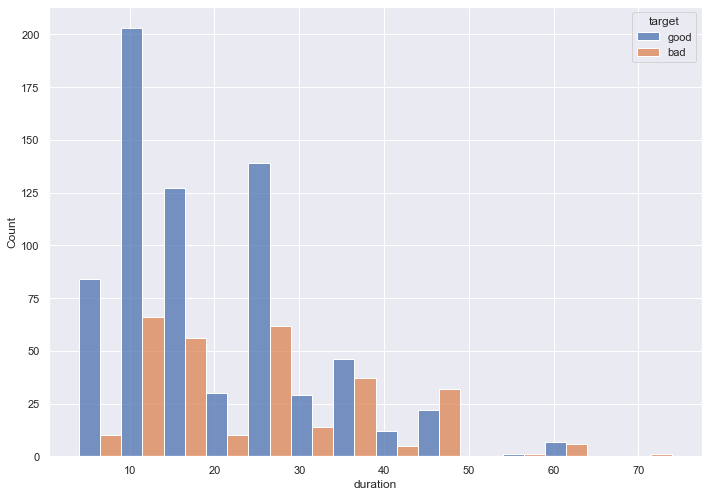

In [80]:
binsize=5
perctl=100
col_name='duration'
sb.histplot(data=data0.loc[data0[col_name]<=np.percentile(data0[col_name],perctl)],hue='target',multiple='dodge'
            ,x=col_name,binwidth=binsize)

<AxesSubplot:xlabel='credit_amount', ylabel='Count'>

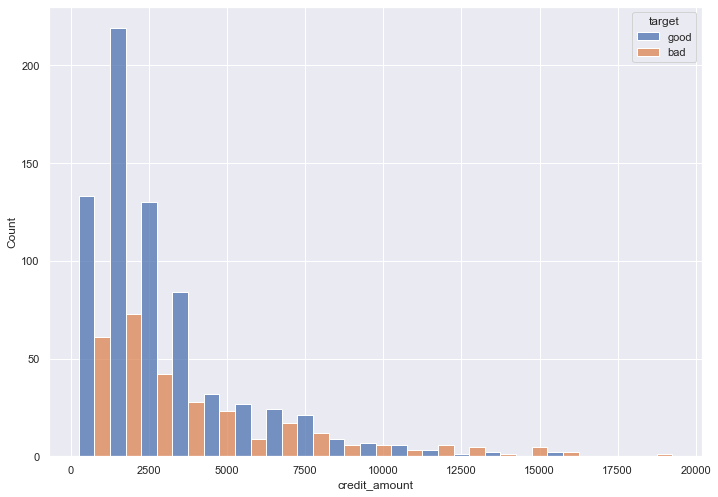

In [81]:
binsize=1000
col_name='credit_amount'
sb.histplot(data=data0.loc[data0[col_name]<=np.percentile(data0[col_name],perctl)],hue='target',multiple='dodge'
            ,x=col_name,binwidth=binsize)

<AxesSubplot:xlabel='installment_commitment', ylabel='Count'>

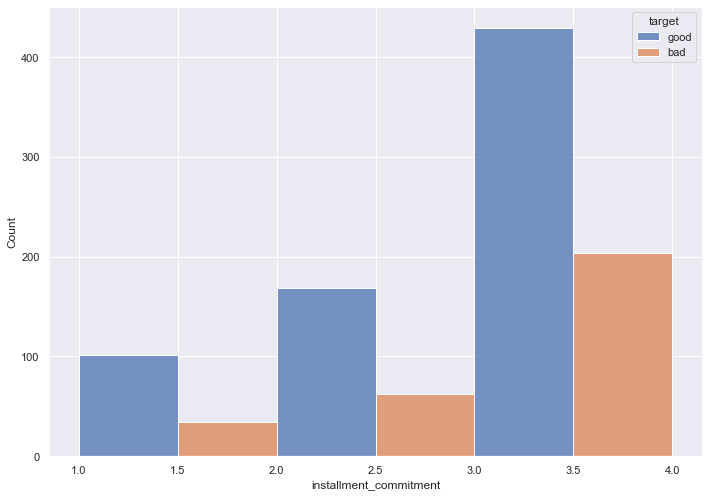

In [82]:
binsize=1
col_name='installment_commitment'
sb.histplot(data=data0.loc[data0[col_name]<=np.percentile(data0[col_name],perctl)],hue='target',multiple='dodge'
            ,x=col_name,binwidth=binsize)

<AxesSubplot:xlabel='residence_since', ylabel='Count'>

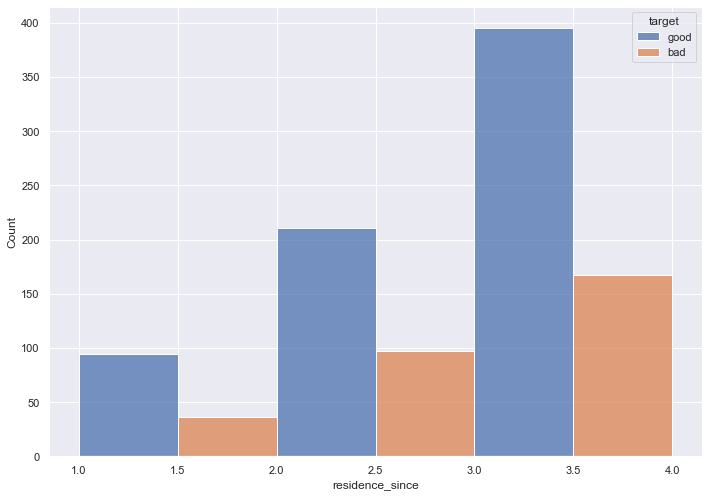

In [83]:
binsize=1
col_name='residence_since'
sb.histplot(data=data0.loc[data0[col_name]<=np.percentile(data0[col_name],perctl)],hue='target',multiple='dodge'
            ,x=col_name,binwidth=binsize)

<AxesSubplot:xlabel='age', ylabel='Count'>

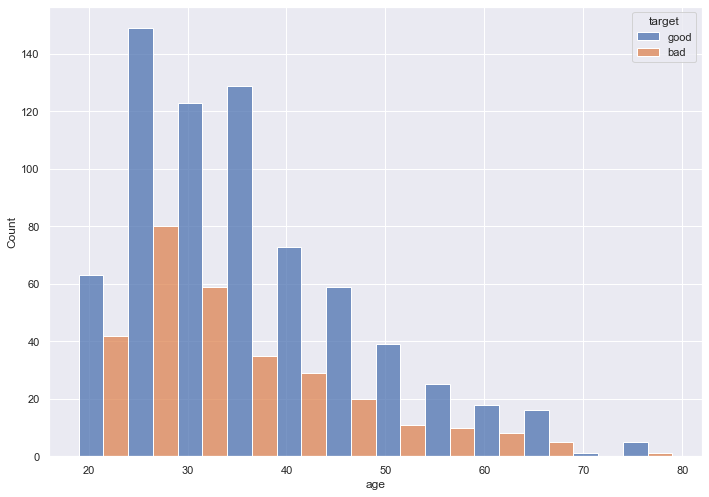

In [84]:
binsize=5
col_name='age'
sb.histplot(data=data0.loc[data0[col_name]<=np.percentile(data0[col_name],perctl)],hue='target',multiple='dodge'
            ,x=col_name,binwidth=binsize)

<AxesSubplot:xlabel='existing_credits', ylabel='Count'>

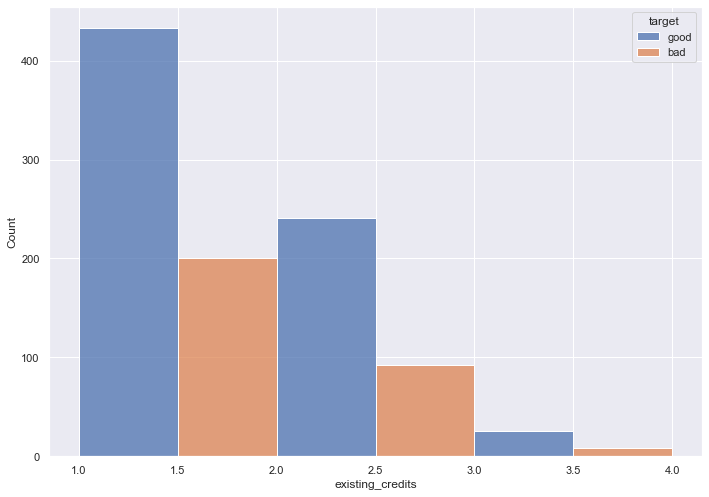

In [85]:
binsize=1
col_name='existing_credits'
sb.histplot(data=data0.loc[data0[col_name]<=np.percentile(data0[col_name],perctl)],hue='target',multiple='dodge'
            ,x=col_name,binwidth=binsize)

<AxesSubplot:xlabel='num_dependents', ylabel='Count'>

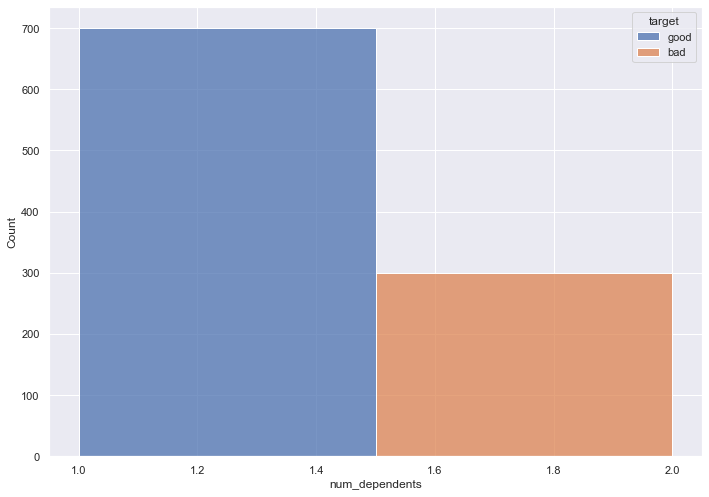

In [86]:
binsize=1
col_name='num_dependents'
sb.histplot(data=data0.loc[data0[col_name]<=np.percentile(data0[col_name],perctl)],hue='target',multiple='dodge'
            ,x=col_name,binwidth=binsize)

Let's do some plots against categorical variables too

<AxesSubplot:xlabel='credit_history', ylabel='count'>

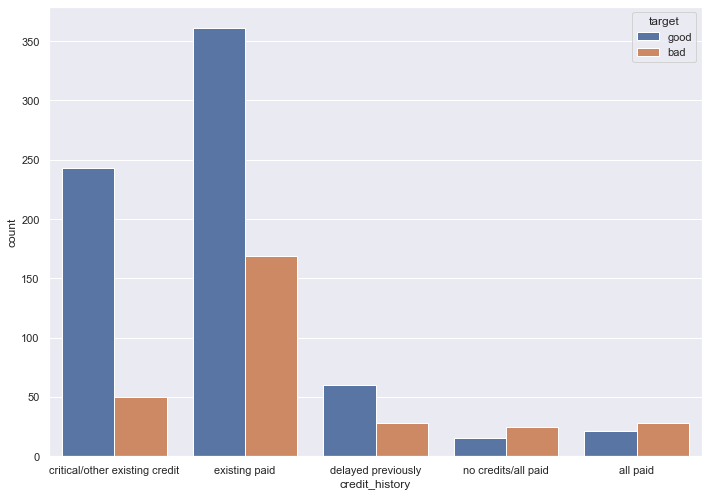

In [87]:
#credit_history
sb.countplot(x="credit_history",hue="target",data=data0)


<AxesSubplot:xlabel='num_dependents', ylabel='count'>

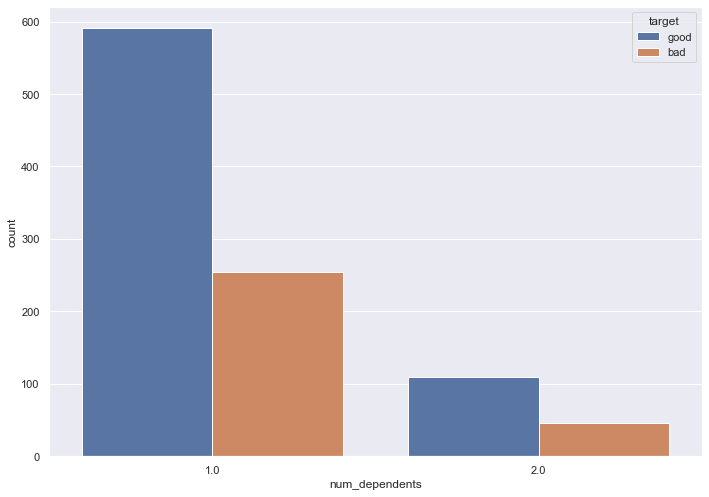

In [88]:
sb.countplot(x="num_dependents",hue="target",data=data0)


<AxesSubplot:xlabel='existing_credits', ylabel='count'>

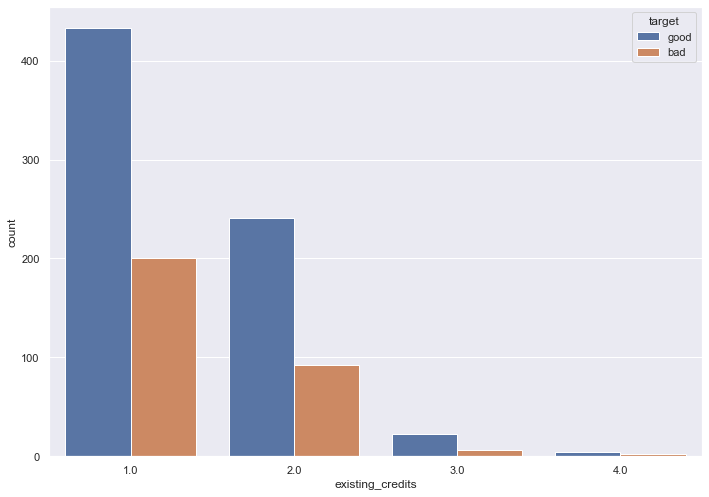

In [89]:
sb.countplot(x="existing_credits",hue="target",data=data0)


<AxesSubplot:xlabel='installment_commitment', ylabel='count'>

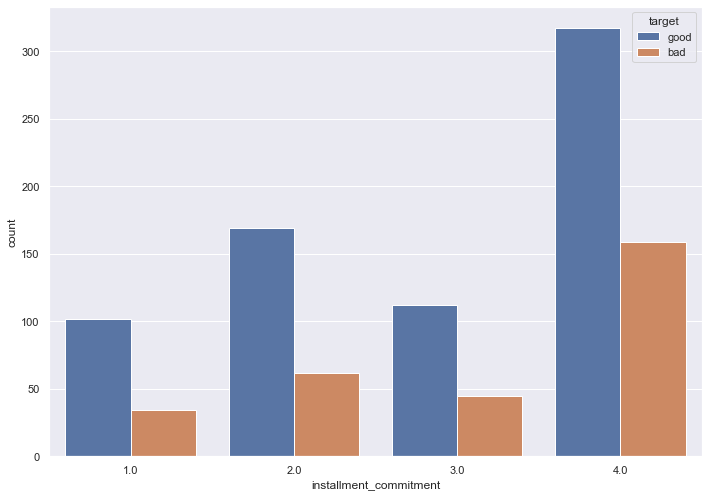

In [90]:

sb.countplot(x="installment_commitment",hue="target",data=data0)


<AxesSubplot:xlabel='employment', ylabel='count'>

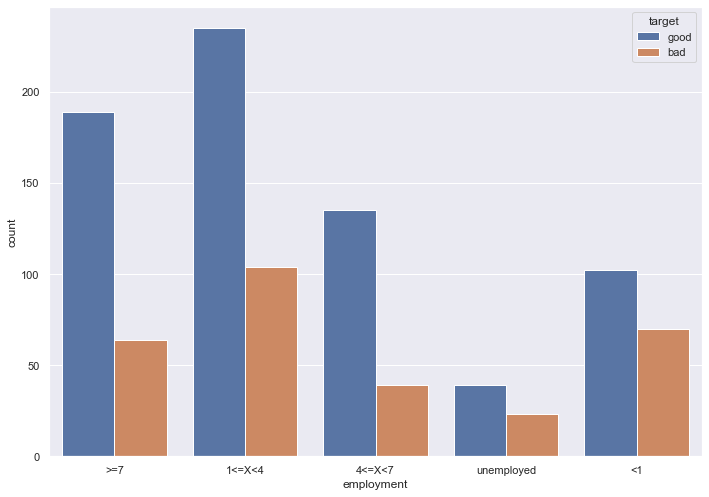

In [91]:
#employment

sb.countplot(x="employment",hue="target",data=data0)


One important thing to notice is almost against all the features, bad is lower in number against good. So we are dealing with an imbalanced classification problem. Let's look at the split of the counts of good and bad in the 1000 records.

In [92]:
data0['target'].value_counts()

good    700
bad     300
Name: target, dtype: int64

The split is 70-30 here as we can see.

Let's try onehotencoding and run the models.

In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    [("onehot", OneHotEncoder(sparse=False), categorical_columns)])

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# get all columns apart from income for the features
data_features = data0.drop("target", axis=1)
# split dataframe and income
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data0['target'], random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(750, 54)


In [95]:
#logisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("Test score: {:.2f}".format(logreg.score(X_test_trans, y_test)))

Test score: 0.71


In [96]:
#linearSVM

from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train_trans, y_train)
y_pred = clf.predict(X_test_trans)

from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.716


In [97]:
#KNN-N=3
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train_trans, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test_trans)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7


Let's do Scaling of continuous variables as well now and see if any improvement in the model accuracy. 

In [98]:
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), continuous_columns),
     ("onehot", OneHotEncoder(sparse=False), categorical_columns)])

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# get all columns apart from income for the features
data_features = data0.drop("target", axis=1)
# split dataframe and income
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data0['target'], random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(750, 61)


In [100]:
#logisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("Test score: {:.2f}".format(logreg.score(X_test_trans, y_test)))

Test score: 0.74


In [101]:
#linearSVM

from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train_trans, y_train)
y_pred = clf.predict(X_test_trans)

from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.732


In [102]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train_trans, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test_trans)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.752


We have seen that there is no improvement in the test score for LinearSVM and KNN but there is slight improvement in the Logistic Regression post standard scaling. 

<h1>HW1-Question3</h1>

In [12]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from random import shuffle

In [13]:
#given ax+by+c=0, I'll be using by converting to a'x+b'y+1=0 and estimate a' and b' throughout the problem in hand.

#function to generate a random line.
def generateLine():
    np.random.seed(0)
    (a,b)=tuple(np.random.uniform(low=-5, high=5, size=(2)))
    return (a,b)

In [14]:
#generate random points from -100 to 100
def generatePoints(n=100,low=-100,high=100):
    np.random.seed(0)
    points=np.random.uniform(low=low, high=high, size=(n,2))
    return points

In [15]:
#to classify each point to class 1 or -1 based on a'x+b'y+1 value
def classifyPoints(points,a,b):
    flag=[]
    for i in range(len(points)):
        val = a*points[i][0]+b*points[i][1]+1
        if(val)>0:
            flag.append(1)
        else:
            flag.append(-1)
    return flag
    

In [16]:
#generate line,points,classify points
def generateData():
    (a,b)=generateLine()
    points=generatePoints(n=100,low=-100,high=100)
    flag = classifyPoints(points,a,b)
    return a,b,points,flag


In [17]:
a,b,points,flag = generateData()

#taking the count of each class
print("1s are {}".format(flag.count(1)))
print("-1s are {}".format(flag.count(-1)))

1s are 53
-1s are 47


In [18]:
#reassigning the points to X and Y
X=points[:,0]
Y=points[:,1]

In [19]:
#assigning colors for each class for the plot
flagcolors=['blue' if i==1 else 'green' for i in flag]

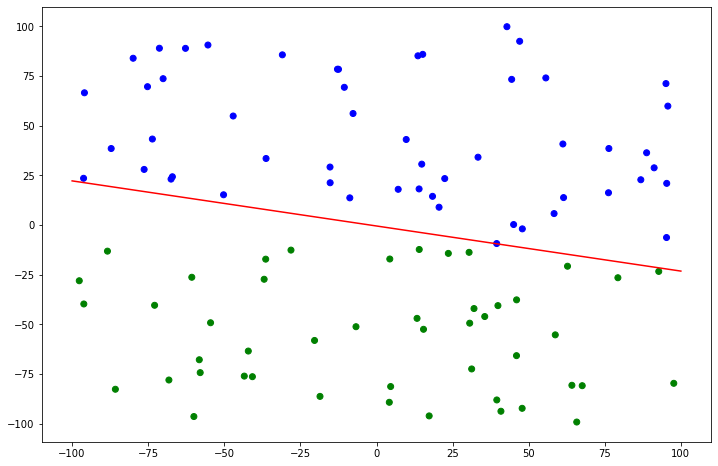

In [20]:
#plotting the points along with the line generated

fig = plt.figure()
fig.set_size_inches(12,8)
ax = plt.axes()
ax.scatter(X,Y,c=flagcolors)
x = np.linspace(-100, 100, 2)
ax.plot(x,(-1-a*x)/b,color='red')

In [21]:
(a,b)

(0.48813503927324753, 2.151893663724195)

In [22]:
#function to implement the algorithm mentioned in the assignment

def binaryclassification(X,Y,flag):
    #Generate a random shuffler to run the iterations on each points for updating the parameters
    n=len(X)
    nlist=list(range(n))
    np.random.seed(0)
    np.random.shuffle(nlist)
    
    #initialize list of predicted class
    predclass=[0]*n
   
    #random intialization of the parameters
    np.random.seed(0)
    w=[np.random.rand(),np.random.rand()]
  
    while True:
    #update W based on the update logic shared:
        for i in nlist:
            
            #check if value is greated than 0 or not with new parameters and assign the class in predclass
            val = w[0]*X[i]+w[1]*Y[i]+1
            if(val)>0:
                predclass[i]=1
            else:
                predclass[i]=-1
            
            # if predicted class is equal to assigned class then continue to next point
            if(flag[i]==predclass[i]):
                continue
                
            #if it is not equal then update the parameters according to wt+1=wt+yx   
            else:
                #print("i = {} x= {} y={} flag ={} predclass={} w0={} w1={} ".format(i,X[i],Y[i],flag[i],predclass[i],w[0],w[1]))
                w=w+flag[i]*points[i]
                val = w[0]*X[i]+w[1]*Y[i]+1
        if(flag==predclass):
            break;
            
    return w

In [23]:
w=binaryclassification(X,Y,flag)

In [24]:
#the final parameters are:
w

array([102.73265218, 432.32372748])

In [25]:
#re check all the points with new parameters and identify which ones are misclassified

flagcolors2=flagcolors.copy()
predclass2=[0]*len(points)
for i in range(len(points)):
    val = w[0]*X[i]+w[1]*Y[i]+1
    if(val)>0:
        predclass2[i]=1
    else:
        predclass2[i]=-1

print("The misclassified points after the updated equation are:") 
print("")

for i in range(len(flag)):
    if(flag[i]!=predclass2[i]):
        #update the color to cyan to 
        flagcolors2[i]="cyan"
        print("{} : X= {}, Y={}, Original Class = {}, Predicted Class ={}".format(i,points[i][0],points[i][1],flag[i],predclass2[i]))

The misclassified points after the updated equation are:



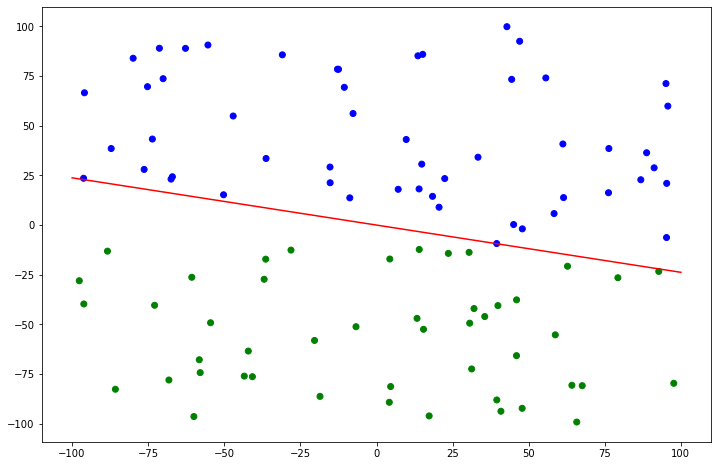

In [26]:
#to plot the line and points with the updated parameters
#misclassified points are colored with cyan

fig2 = plt.figure()
fig2.set_size_inches(12,8)
ax2 = plt.axes()
ax2.scatter(X,Y,c=flagcolors2)
x = np.linspace(-100, 100, 2)
ax2.plot(x,(-1*(1/w[1])-(w[0]/w[1])*x),color='red')

<h1>HW1-Question4</h1>

In [118]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import math,statistics
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import operator

In [119]:
col_names=[
'sepal length',
'sepal width',
'petal length',
'petal width',
'class'
]

In [120]:
data0=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",names=col_names)

In [121]:
data0.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [122]:
features=list(data0.columns[0:len(data0.columns)-1])

In [123]:
print(features)

['sepal length', 'sepal width', 'petal length', 'petal width']


In [124]:
data0['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [125]:
print(data0.describe())

       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [126]:
def remove_max(a):
    max0=0
    for i in a.keys():
        if(a[i]>max0):
            max0=a[i]
            maxindex=i
    return maxindex

In [127]:
def eucd_distance(testinstance,traininginstance,numberDimensions):
    distance=0
    for i in range(numberDimensions):
        distance+=np.square(traininginstance[i]-testinstance[i])
    return np.sqrt(distance)

In [128]:
def neighbor_class(neighbor,col):
    return neighbor.idxmax()[col]

In [129]:
def knn_reverse(testinstance,trainingdata,k):
    nd=len(testinstance)
    nrows=trainingdata.shape[0]
    distances={}
    classes=list(trainingdata["class"].unique())
    
    for i in range(nrows):
        distances[i]=eucd_distance(testinstance,trainingdata.iloc[i,:],nd)
    
    indmax=0
    for i in range(nrows-k+1):
        indmax=remove_max(distances)
        distances.pop(indmax)
    
    k_neighbors=trainingdata.iloc[list(distances.keys()),:] 
    
    neighbors_counts = pd.DataFrame({"counts":[0]*len(classes)},index=classes)
    
    for i in (k_neighbors.index):
        neighbors_counts.at[k_neighbors.at[i,"class"],"counts"]+=1
    
    return neighbor_class(neighbors_counts,"counts")

In [130]:
#https://www.geeksforgeeks.org/k-largestor-smallest-elements-in-an-array/
#modified according to the dictionary requirement of our use-case as we need to store the indices of the k nearest neighbors

def LastKelements(inputdict,k):
     
    maxHeapList = list(inputdict.items())[:k]
    maxHeap=dict(maxHeapList)
    size = len(inputdict)
    inputlist=list(inputdict.items())
    
    #print("first")
    #print(maxHeapList)
    
    for i in list(inputdict.keys())[k:size]:
            #print(maxHeapList)
            #print(inputlist[i])
            maxHeapList=sorted(maxHeap.items(),key=operator.itemgetter(1),reverse=True)
            maxHeap=dict(maxHeapList)
            if (maxHeapList[0][1] < inputlist[i][1]):
                continue
            else:
                maxHeap.pop(maxHeapList[0][0])
                maxHeap[inputlist[i][0]]=inputlist[i][1]
    return maxHeap
    # Now max heap contains k minimum elements

In [131]:
def knn_heap(testinstance,trainingdata,k):
    nd=len(testinstance)
    nrows=trainingdata.shape[0]
    distances={}
    classes=list(trainingdata["class"].unique())
    
    for i in range(nrows):
        distances[i]=eucd_distance(testinstance,trainingdata.iloc[i,:],nd)
    #print((distances))
    k_distances=LastKelements(distances,k)
    
    k_neighbors=trainingdata.iloc[list(k_distances.keys()),:] 
    
    neighbors_counts = pd.DataFrame({"counts":[0]*len(classes)},index=classes)
    
    for i in (k_neighbors.index):
        neighbors_counts.at[k_neighbors.at[i,"class"],"counts"]+=1
    
    return neighbor_class(neighbors_counts,"counts")

In [132]:
X=data0[features]
y=data0["class"]    

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

y_pred=pd.DataFrame(y_test)
y_pred["predicted_class"]=""
X_test2=pd.DataFrame(X_test)
X_train2=data0.loc[X_train.index,:]
for i in X_test2.index:
    predictedClass=knn_reverse(X_test2.loc[i,:],X_train2,3)
    y_pred.at[i,"predicted_class"]=predictedClass

y_pred[y_pred["class"]!=y_pred["predicted_class"]]

from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_pred["predicted_class"],y_pred["class"]))

Accuracy: 0.9736842105263158


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

y_pred=pd.DataFrame(y_test)
y_pred["predicted_class"]=""
X_test2=pd.DataFrame(X_test)
X_train2=data0.loc[X_train.index,:]
for i in X_test2.index:
    predictedClass=knn_heap(X_test2.loc[i,:],X_train2,3)
    y_pred.at[i,"predicted_class"]=predictedClass

y_pred[y_pred["class"]!=y_pred["predicted_class"]]
print("Accuracy:",metrics.accuracy_score(y_pred["predicted_class"],y_pred["class"]))

Accuracy: 0.9736842105263158


Precision of the algorithm with random split 97%.<br>

For the first part of KNN reverse implementation, time complexity is O(n^2) where I just I eliminated the farthest point in each iteration by finding the maximum distance point.

For the second part using heap search using MaxHeap, the time complexity is O(k*log(k) + (n-k)*log(k))

<h4> Q1 References </h4>

- https://www.kaggle.com/negarev/beginners-start-here-house-prices-eda

- https://www.kaggle.com/davinci23/house-price-prediction-using-linear-regression

<h4> Q3 References </h4>

- https://www.kaggle.com/kabure/predicting-credit-risk-model-pipeline
- https://machinelearningmastery.com/imbalanced-classification-of-good-and-bad-credit/


<h4> Q4 References </h4>

- https://www.geeksforgeeks.org/k-largestor-smallest-elements-in-an-array/
- https://medium.com/@avulurivenkatasaireddy/k-nearest-neighbors-and-implementation-on-iris-data-set-f5817dd33711
